In [ ]:
%pip install pycaret

In [28]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [ ]:
df = pd.read_csv('salaries.csv')

In [20]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Pycaret preprocess=True

In [21]:
setup_pycaret_1 = setup(
    data=df,
    target='salary_in_usd',
    preprocess=True
)

,Description,Value
0,Session id,2158
1,Target,salary_in_usd
2,Target type,Regression
3,Original data shape,"(3755, 11)"
4,Transformed data shape,"(3755, 36)"
5,Transformed train set shape,"(2628, 36)"
6,Transformed test set shape,"(1127, 36)"
7,Numeric features,3
8,Categorical features,7
9,Preprocess,True


In [30]:
top_3_models  =  compare_models(sort='MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,1224.3913,77097583.4308,7433.6658,0.9803,0.1364,0.0351,0.1620
rf,Random Forest Regressor,1359.2146,62888384.1079,7490.9837,0.9842,0.1383,0.0460,1.0090
xgboost,Extreme Gradient Boosting,1383.2128,54944544.7686,6607.0010,0.9862,0.1167,0.0339,0.2520
et,Extra Trees Regressor,1622.0902,53304321.0038,7117.5540,0.9865,0.1457,0.0512,0.6840
gbr,Gradient Boosting Regressor,1889.3522,38326508.3305,5664.0876,0.9905,0.1226,0.0445,0.3640
lightgbm,Light Gradient Boosting Machine,1913.6971,48671197.2827,6752.0555,0.9878,0.1619,0.0541,1.4050
knn,K Neighbors Regressor,3044.0845,202392404.6676,13460.3691,0.9485,0.1888,0.0961,0.1600
ada,AdaBoost Regressor,10987.9445,220680330.9542,14650.8019,0.9440,0.2468,0.1681,0.5620
lr,Linear Regression,36277.3775,2414447958.7260,48879.7110,0.3841,0.4423,0.4263,0.2620
llar,Lasso Least Angle Regression,36312.9020,2421777832.2373,48939.9559,0.3826,0.4443,0.4286,0.1580


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [31]:
top_3_models[0]

DecisionTreeRegressor(random_state=2158)

In [32]:
top_3_models[1]

RandomForestRegressor(n_jobs=-1, random_state=2158)

In [33]:
top_3_models[2]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=2158, ...)

In [60]:
def tune_models(models, metric='MAE'):
  tuned_models = []
  for i, model in enumerate(models, start=1):
    print(f"Tuning modelo {i}: {model.__class__.__name__}")
    tuned_model = tune_model(model, optimize=metric)
    tuned_models.append(tuned_model)
    print(f"Modelo {i} tuned \n")

  return tuned_models

In [50]:
def evaluate_models(models):
  for i, model in enumerate(models, start=1):
    print(f"Evaluando el modelo {i}: {model.__class__.__name__}")
    evaluate_model(model)
    print(f"Modelo {i} evaluado \n")


In [51]:
def plot_model_details(models):
  for i, model in enumerate(models, start=1):
    print(f"Gráficos del modelo {i}: {model.__class__.__name__}")
    print("\n Importancia de características:")
    plot_model(model, plot='feature')
    print("\n Gráfico de residuos:")
    plot_model(model, plot='residuals')
    print("\n Gráfico de Predicted vs Actual:")
    plot_model(model, plot='error')
    print("\n")


In [61]:
tuned_models = tune_models(top_3_models, metric='MAE')

Tuning modelo 1: DecisionTreeRegressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1885.9391,62374697.6618,7897.7654,0.9827,0.0998,0.0283
1,2516.2660,193746586.3353,13919.2883,0.9526,0.1906,0.0362
2,1323.8645,48857718.3473,6989.8296,0.9847,0.1183,0.0283
3,2137.8061,74210806.9508,8614.5695,0.9844,0.1149,0.0336
4,1683.0531,68948629.6288,8303.5312,0.9832,0.2035,0.0995
5,1078.4456,24478826.1200,4947.6081,0.9930,0.1456,0.0418
6,1640.9416,56832552.1646,7538.7368,0.9836,0.1817,0.0630
7,1619.3199,33652032.6731,5801.0372,0.9922,0.0818,0.0189
8,1206.5095,11923078.1553,3452.9811,0.9968,0.0447,0.0157


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo 1 tuned 

Tuning modelo 2: RandomForestRegressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2267.2367,78248711.5135,8845.8302,0.9783,0.1680,0.0606
1,2969.0212,203308434.9884,14258.6267,0.9503,0.1602,0.0418
2,1710.1241,56320127.3818,7504.6737,0.9824,0.1219,0.0331
3,3232.3598,203496214.9217,14265.2100,0.9573,0.1463,0.0469
4,2508.8546,110695347.3863,10521.1856,0.9731,0.2472,0.1386
5,1941.4538,62197525.4746,7886.5408,0.9822,0.2335,0.1083
6,2380.0275,102936835.8258,10145.7792,0.9703,0.2014,0.0767
7,2001.6770,48466193.3097,6961.7665,0.9887,0.0623,0.0202
8,1706.2082,26731439.2976,5170.2456,0.9927,0.1321,0.0414


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo 2 tuned 

Tuning modelo 3: XGBRegressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1640.4879,41413604.3282,6435.3403,0.9885,0.1270,0.0385
1,2592.9302,197891056.4097,14067.3756,0.9516,0.1477,0.0294
2,1477.3719,18570414.5432,4309.3404,0.9942,0.0791,0.0211
3,2262.1754,73354411.7122,8564.7190,0.9846,0.1093,0.0282
4,1810.6391,69696336.6581,8348.4332,0.9831,0.2229,0.1163
5,1542.6329,22611007.6043,4755.1033,0.9935,0.1766,0.0480
6,1725.6575,48381593.8502,6955.6879,0.9860,0.1548,0.0514
7,1505.5960,21898829.0454,4679.6185,0.9949,0.0645,0.0196
8,1408.1438,10262869.3579,3203.5713,0.9972,0.0677,0.0210


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo 3 tuned 



In [57]:
evaluate_models(tuned_models)

Evaluando el modelo 1: DecisionTreeRegressor


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Modelo 1 evaluado 

Evaluando el modelo 2: RandomForestRegressor


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Modelo 2 evaluado 

Evaluando el modelo 3: XGBRegressor


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Modelo 3 evaluado 



Gráficos del modelo 1: DecisionTreeRegressor

 Importancia de características:


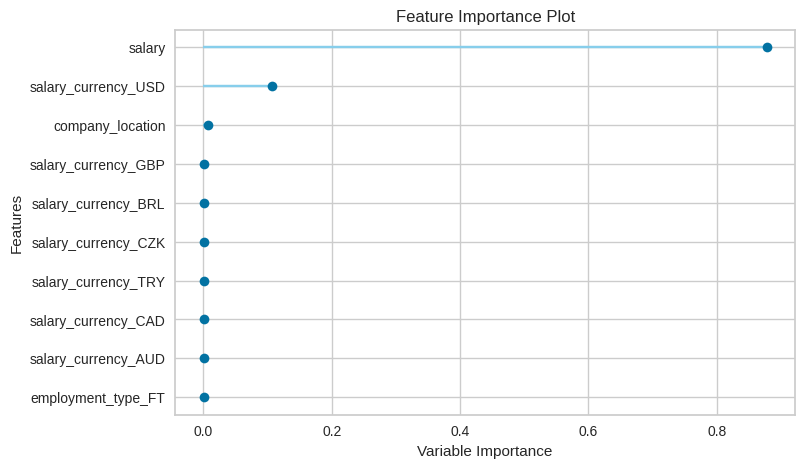


 Gráfico de residuos:


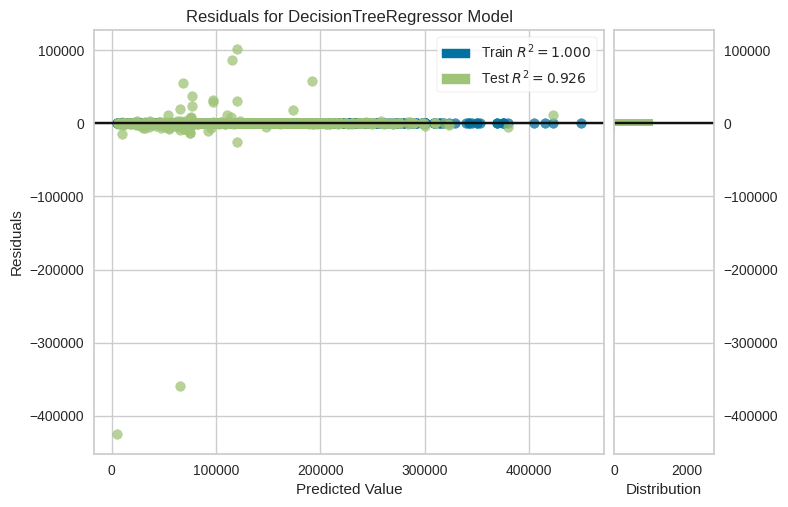


 Gráfico de Predicted vs Actual:


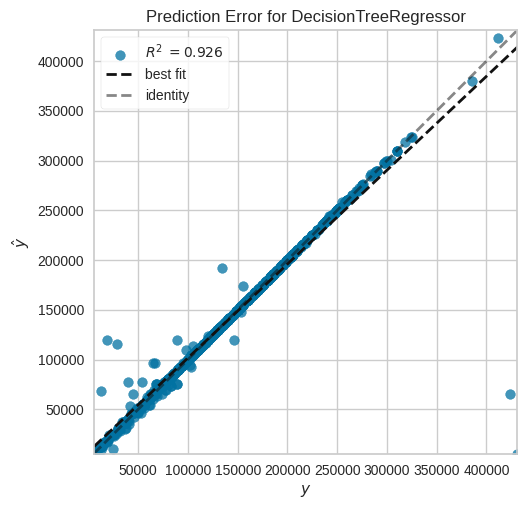



Gráficos del modelo 2: RandomForestRegressor

 Importancia de características:


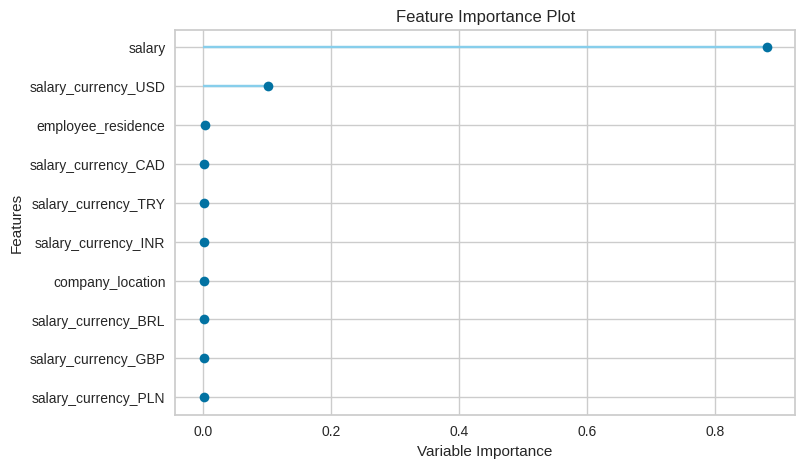


 Gráfico de residuos:


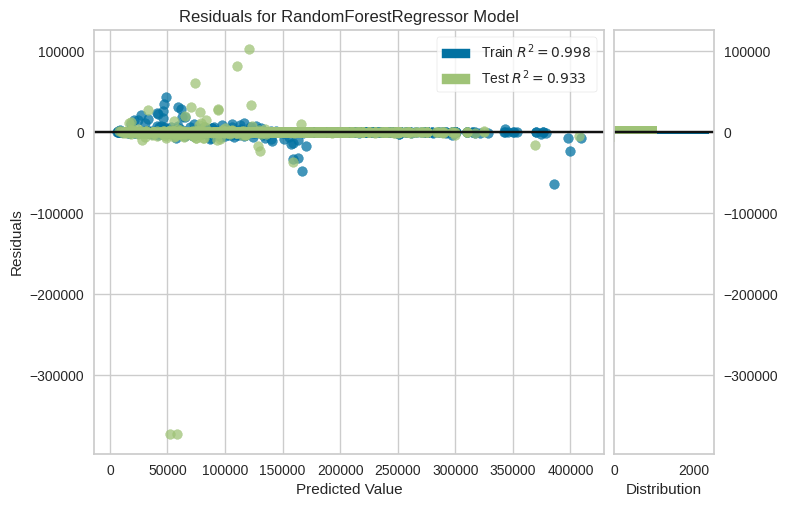


 Gráfico de Predicted vs Actual:


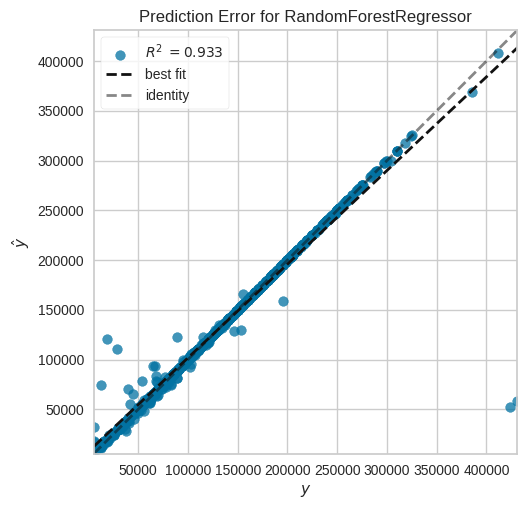



Gráficos del modelo 3: XGBRegressor

 Importancia de características:


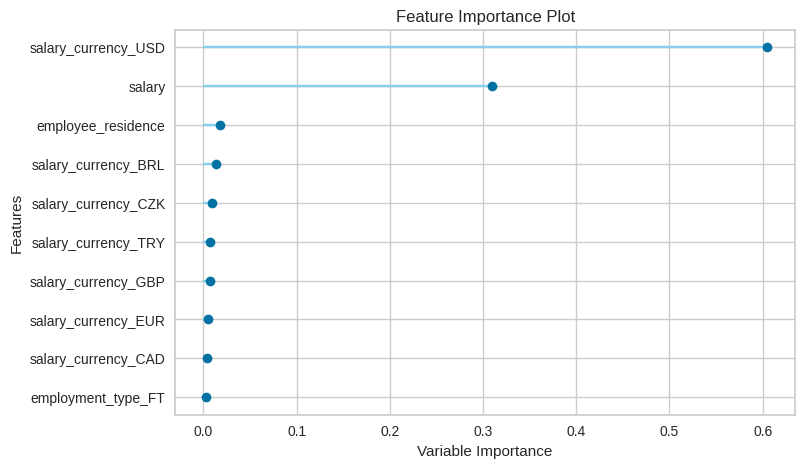


 Gráfico de residuos:


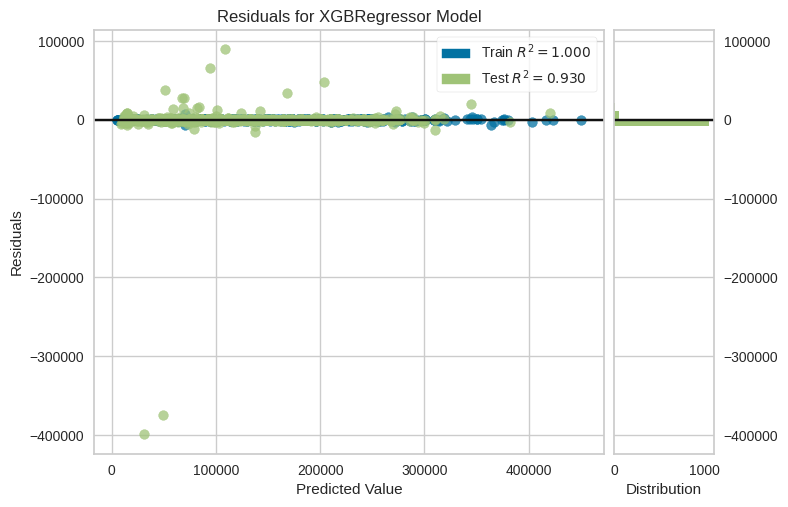


 Gráfico de Predicted vs Actual:


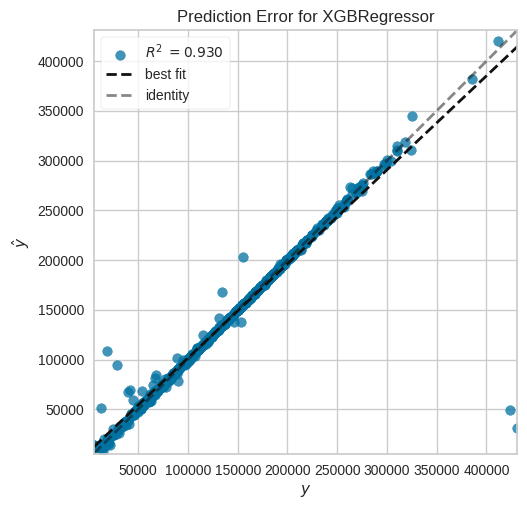

In [58]:
plot_model_details(tuned_models)

### Evaluación de los Modelos
Se seleccionaron los tres mejores modelos, los cuales son:

* DecisionTreeRegressor
* RandomForestRegressor
* XGBRegressor

La métrica de mayor importancia utilizada en el análisis fue el MAE (Error Absoluto Medio). A continuación, se presentan los resultados obtenidos al evaluar estos modelos sin realizar un ajuste de hiperparámetros:

* DecisionTreeRegressor: MAE de 1224.3913
* RandomForestRegressor: MAE de 1359.2146
* XGBRegressor: MAE de 1383.2128

Al realizar la búsqueda de hiperparámetros (tuning), los resultados son los siguientes:

* DecisionTreeRegressor: MAE de 1078.4456
* RandomForestRegressor: MAE de 1706.2082
* XGBRegressor: MAE de 1408.1438

De esta forma, podemos observar que, tras realizar la búsqueda de hiperparámetros, el mejor modelo, tomando como referencia nuestra métrica seleccionada (MAE), es DecisionTreeRegressor.

### Comparacion de modelos con respecto al taller anterior.

Podemos observar que, al permitir que PyCaret realice el procesamiento de los datos, los resultados mejoran considerablemente. Por ejemplo, al pasar de un MAE de 28851.09298613299 con el modelo GradientBoostingRegressor en el taller anterior, obtenemos un MAE de 1078.4456 con el modelo DecisionTreeRegressor, ambos después de realizar la búsqueda de hiperparámetros.

Sin embargo, al validar los resultados y considerando que nuestra variable objetivo es salary_in_usd (el salario en dólares), notamos que PyCaret utiliza las columnas salary y salary_currency con gran importancia en el entrenamiento de los modelos. Estas columnas, sin embargo, deberían ser ignoradas como entradas al modelo, ya que si logramos predecir correctamente el salario en dólares, es sencillo realizar la conversión a otra moneda y obtener el salario en la moneda local. Por lo tanto, las predicciones basadas en esas columnas no deberían influir en la exactitud del modelo.